## Lesson 05 — Numpy, Pandas and Matplotlib introduction

Here will introduce Numpy, Pandas, and Matplotlib. Numpy is the core numerical computing package in Python, and its core type is ndarray. Pandas uses DataFrames (tables, much like R DataFrames) and Series (columns of a DataFrame) with powerful SQL-like queries. Matplotlib is a package for plotting, which uses a MATLAB-style syntax.

### Readings

* [_NumPy Basics: Arrays and Vectorized Computation_, by Wes McKinney](https://wesmckinney.com/book/numpy-basics)
* [_Getting Started with pandas_, by Wes McKinney](https://wesmckinney.com/book/pandas-basics)

### Table of Contents

* [Numpy](#Numpy)
* [Pandas](#Pandas)
* [Matplotlib](#Matplotlib)

### Numpy

Today we will work with several new packages and the data types they provide: the Numpy `ndarray` and the Pandas `Series` and `DataFrame`. These data types have many of the properties of `list` but are much more powerful.

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy`, you need to import the module:

In [1]:
import numpy as np

#### Creating Numpy arrays

There are a number of ways to initialize new Numpy arrays, for example from

* converting from Python lists or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

##### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1, 2, 3, 4])
v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` (n-dimensional array) that the `numpy` module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`:

In [8]:
np.shape(M)

(2, 2)

In [9]:
np.size(M)

4

So far the `numpy.ndarray` looks a lot like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [10]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [11]:
# M[0, 0] = 'hello'

In [12]:
M[0, 0] = 5

In [13]:
M

array([[5, 2],
       [3, 4]])

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [14]:
N = np.array([[1, 2], [3, 4]], dtype=complex)
N

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, and `object` (string).

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

#### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit pythons lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

In [15]:
# create a range (the end value is not included)
x = np.arange(-1, 1, 0.1)  # arguments: start, stop, step
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [16]:
# dtype is determined automatically unless specified
x.dtype

dtype('float64')

In [17]:
# range of integers
y = np.arange(0, 10, 1)  # arguments: start, stop, step
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
y.dtype

dtype('int64')

In [19]:
# specifying dtype as float
z = np.arange(0, 10, 1, dtype=float)  # arguments: start, stop, step
z

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [20]:
z.dtype

dtype('float64')

In [21]:
# using linspace, both end points ARE included
np.linspace(0, 10, 11)  # arguments: start, stop, N

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [22]:
# similar to meshgrid in MATLAB
x, y = np.mgrid[0:5, 0:5]

In [23]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [24]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [25]:
# uniform random numbers in interval [0,1]
np.random.rand(5, 5)

array([[0.75996779, 0.81023063, 0.4406506 , 0.22958158, 0.97276794],
       [0.05713286, 0.93460897, 0.69815786, 0.46827199, 0.33320538],
       [0.0827898 , 0.42089086, 0.55967666, 0.53966779, 0.66465316],
       [0.81573186, 0.79090642, 0.58930614, 0.22101266, 0.86608193],
       [0.73121726, 0.66996184, 0.49507093, 0.27731768, 0.23475555]])

In [26]:
# standard normal distributed random numbers
np.random.randn(5, 5)

array([[-0.20884595,  0.91253099, -0.12402218,  0.06507922, -1.14661237],
       [ 0.67104945,  0.35996379,  0.46133985, -0.96983245, -1.95071097],
       [-1.68077778,  0.60213287,  0.33650751,  0.57240531,  0.20062766],
       [ 0.27673222, -0.48399621, -0.27290662,  0.06997872,  0.27309412],
       [-0.05888385,  0.01893797, -2.01843844, -1.42732441, -1.24836902]])

In [27]:
# diagonal matrix
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [28]:
# zeros
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [29]:
# ones
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
# ones as int
np.ones((3, 3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [31]:
# three-dimensional
np.ones((3, 3, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [32]:
# four-dimensional
np.ones((3, 3, 3, 3))

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [33]:
# you can also pass one numpy array as argument to the other
np.diag(np.ones(5))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### Indexing

We can index elements in an array using the square bracket and indices:

In [34]:
# v is a vector, and has only one dimension, taking one index
v[0]

np.int64(1)

In [35]:
# M is a matrix, or a 2 dimensional array, taking two indices
M[1, 1]

np.int64(4)

In [36]:
# If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [37]:
M[1, :]  # row 1

array([3, 4])

In [38]:
M[:, 1]  # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [39]:
M[0, 0] = -1
M

array([[-1,  2],
       [ 3,  4]])

In [40]:
# also works for rows and columns
M[0, :] = 0
M[:, 1] = -2

In [41]:
M

array([[ 0, -2],
       [ 3, -2]])

#### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [42]:
A = np.array([1, 2, 3, 4, 5])
A

array([1, 2, 3, 4, 5])

In [43]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [44]:
A[1:3] = [-2, -3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [45]:
A[::]  # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [46]:
A[::2]  # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [47]:
A[:3]  # first three elements

array([ 1, -2, -3])

In [48]:
A[3:]  # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [49]:
A = np.array([1, 2, 3, 4, 5])

In [50]:
A[-1]  # the last element in the array

np.int64(5)

In [51]:
A[-3:]  # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [52]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [53]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [54]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

#### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [55]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [56]:
col_indices = [1, 2, 3]
A[row_indices, col_indices]

array([11, 22, 33])

In [57]:
# equivalent to
A[1, 1], A[2, 2], A[3, 3]

(np.int64(11), np.int64(22), np.int64(33))

We can also index *masks*: If the index mask is an Numpy array of with data type `bool`, then an element is selected (`True`) or not (`False`) depending on the value of the index mask at the position each element: 

In [58]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [59]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [60]:
# same thing
row_mask = np.array([1, 0, 1, 0, 0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [61]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [62]:
# want values of x that are at least 5 and have no decimal component
mask = (x >= 5) & (x % 1 == 0)
mask

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [63]:
x[mask]

array([5., 6., 7., 8., 9.])

In [64]:
x[x > 5]

array([5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

#### Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

In [65]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [66]:
v1 * 2

array([0, 2, 4, 6, 8])

In [67]:
v1 + 2

array([2, 3, 4, 5, 6])

In [68]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [69]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [70]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [71]:
np.dot(v1, v1)

np.int64(30)

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra. There is a ton of matrix math that we won't cover here.

In [72]:
M = np.matrix(A)
v = np.matrix(v1).T  # make it a column vectorm

In [73]:
M

matrix([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34],
        [40, 41, 42, 43, 44]])

In [74]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [75]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [76]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

#### Data computations

In [77]:
np.mean(v1)

np.float64(2.0)

In [78]:
np.std(v1), np.var(v1)

(np.float64(1.4142135623730951), np.float64(2.0))

In [79]:
v1.min()

np.int64(0)

In [80]:
v1.max()

np.int64(4)

In [81]:
sum(v1)

np.int64(10)

#### Iterating over array elements

In [82]:
for element in v1:
    print(element)

0
1
2
3
4


In [83]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [84]:
for row in M:
    print("row", row)
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


In [85]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
        # modify the matrix M: square each element
        M[row_idx, col_idx] = element**2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [86]:
# each element in M are now squared
M

array([[ 1,  4],
       [ 9, 16]])

In [87]:
# another way to square a matrix
M**2

array([[  1,  16],
       [ 81, 256]])

### Pandas

#### What is Pandas?

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

#### Library features

* DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different file formats
* Data alignment and integrated handling of missing data
* Reshaping and pivoting of data sets
* Label-based slicing, fancy indexing, and subsetting of large data sets
* Data structure column insertion and deletion
* Group-by engine allowing split-apply-combine operations on data sets
* Dataset merging and joining
* Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging

The library is highly optimized for performance, with critical code paths written in Cython or C.

#### Download data

We are going to load and do a first analysis of a labour market dataset from Germany.

I copied data from one of the tables from [Statistiches Bundesamt: Labour Market - Employment](https://www.destatis.de/EN/Themes/Labour/Labour-Market/Employment/_node.html#266484). The table is called [Persons in employment: Germany, years (until 2019), economic sections (WZ2008), sex (code 12211-9008)](https://www-genesis.destatis.de/datenbank/online/url/6799e981). I have downloaded the file, pre-cleaned the data to be used on the class, and saved it to a directory called `data` at the same level as `lessons`. The file is called `employment-12211-9008_en.csv`.

#### Install packages

Install pandas and matplotlib using if you haven't already:

In [88]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Import modules

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Read data from CSV

In [90]:
data1 = pd.read_csv("../data/employment-12211-9008_en.csv", index_col=None, header=0)

In [91]:
data1.head()

,Variable,Sector,Year,Female,Male,Total
0,WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
1,WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
2,WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
3,WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
4,WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000


In [92]:
data2 = pd.read_csv("../data/employment-12211-9008_en.csv", index_col=2, header=0)

In [93]:
data2.head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009,WZ08-A,"Agriculture, forestry and fishing",220000,428000,648000
2010,WZ08-A,"Agriculture, forestry and fishing",214000,423000,637000
2011,WZ08-A,"Agriculture, forestry and fishing",213000,426000,639000
2012,WZ08-A,"Agriculture, forestry and fishing",200000,413000,612000
2013,WZ08-A,"Agriculture, forestry and fishing",186000,387000,573000


In [94]:
data2.describe()

,Female,Male,Total
count,2.310000e+02,2.310000e+02,2.310000e+02
mean,8.893333e+05,1.027610e+06,1.916944e+06
std,1.008617e+06,1.270668e+06,2.002257e+06
min,7.000000e+03,1.000000e+04,1.800000e+04
25%,1.710000e+05,2.405000e+05,3.250000e+05
50%,4.850000e+05,6.600000e+05,1.290000e+06
75%,1.161000e+06,1.260000e+06,2.590500e+06
max,4.314000e+06,5.831000e+06,8.010000e+06


#### Indexing in pandas

There are two ways to index a Pandas DataFrame.

* `loc` works on labels in the index.
* `iloc` works on the positions in the index (so it only takes integers).

#### With no index column (data1)

In [95]:
data1.iloc[0]

Variable                               WZ08-A
Sector      Agriculture, forestry and fishing
Year                                     2009
Female                                 220000
Male                                   428000
Total                                  648000
Name: 0, dtype: object

In [96]:
data1.loc[0]

Variable                               WZ08-A
Sector      Agriculture, forestry and fishing
Year                                     2009
Female                                 220000
Male                                   428000
Total                                  648000
Name: 0, dtype: object

In [97]:
data1["Sector"].head()

0    Agriculture, forestry and fishing
1    Agriculture, forestry and fishing
2    Agriculture, forestry and fishing
3    Agriculture, forestry and fishing
4    Agriculture, forestry and fishing
Name: Sector, dtype: object

In [98]:
data1.Sector.head()

0    Agriculture, forestry and fishing
1    Agriculture, forestry and fishing
2    Agriculture, forestry and fishing
3    Agriculture, forestry and fishing
4    Agriculture, forestry and fishing
Name: Sector, dtype: object

In [99]:
data1[["Sector", "Year", "Total"]].head()

,Sector,Year,Total
0,"Agriculture, forestry and fishing",2009,648000
1,"Agriculture, forestry and fishing",2010,637000
2,"Agriculture, forestry and fishing",2011,639000
3,"Agriculture, forestry and fishing",2012,612000
4,"Agriculture, forestry and fishing",2013,573000


In [100]:
data1.iloc[:, 1].head()

0    Agriculture, forestry and fishing
1    Agriculture, forestry and fishing
2    Agriculture, forestry and fishing
3    Agriculture, forestry and fishing
4    Agriculture, forestry and fishing
Name: Sector, dtype: object

#### With Date as the index column (data2)

In [101]:
data2.iloc[0]

Variable                               WZ08-A
Sector      Agriculture, forestry and fishing
Female                                 220000
Male                                   428000
Total                                  648000
Name: 2009, dtype: object

In [102]:
data2.iloc[0]

Variable                               WZ08-A
Sector      Agriculture, forestry and fishing
Female                                 220000
Male                                   428000
Total                                  648000
Name: 2009, dtype: object

In [103]:
data2.loc[2009].head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009,WZ08-A,"Agriculture, forestry and fishing",220000,428000,648000
2009,WZ08-B,Mining and quarrying,13000,91000,104000
2009,WZ08-C,Manufacturing,2114000,5737000,7851000
2009,WZ08-D,"Electricity, gas, steam, air conditioning supply",83000,253000,335000
2009,WZ08-E,"Water supply,sewerage,waste management,remedia...",45000,180000,225000


In [104]:
data2["Total"].head()

Year
2009    648000
2010    637000
2011    639000
2012    612000
2013    573000
Name: Total, dtype: int64

#### Selecting scoped data

In [105]:
scope = data1[data1["Sector"] == "Professional, scientific and technical activities"]
scope

,Variable,Sector,Year,Female,Male,Total
132,WZ08-M,"Professional, scientific and technical activities",2009,959000,945000,1904000
133,WZ08-M,"Professional, scientific and technical activities",2010,975000,949000,1924000
134,WZ08-M,"Professional, scientific and technical activities",2011,1002000,1006000,2008000
135,WZ08-M,"Professional, scientific and technical activities",2012,987000,999000,1986000
136,WZ08-M,"Professional, scientific and technical activities",2013,1048000,1093000,2141000
137,WZ08-M,"Professional, scientific and technical activities",2014,1077000,1089000,2166000
138,WZ08-M,"Professional, scientific and technical activities",2015,1102000,1120000,2222000
139,WZ08-M,"Professional, scientific and technical activities",2016,1156000,1187000,2343000
140,WZ08-M,"Professional, scientific and technical activities",2017,1166000,1219000,2385000
141,WZ08-M,"Professional, scientific and technical activities",2018,1169000,1212000,2381000


#### Convert date/time to timestamp object

In [106]:
time = pd.to_datetime(scope["Year"], format="%Y")
time.head()

132   2009-01-01
133   2010-01-01
134   2011-01-01
135   2012-01-01
136   2013-01-01
Name: Year, dtype: datetime64[ns]

In [107]:
type(time)

pandas.core.series.Series

In [108]:
time.dtype

dtype('<M8[ns]')

### Matplotlib

#### Plot a single variable vs. time

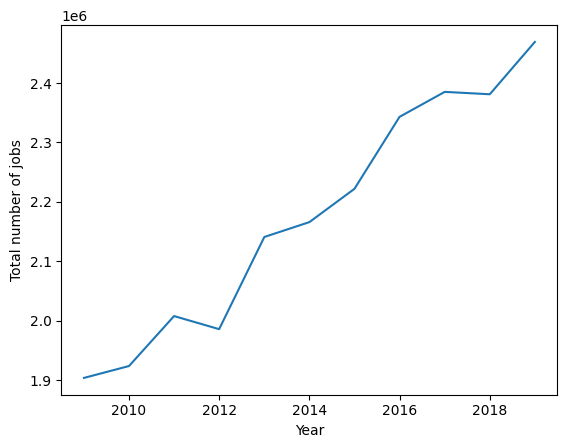

In [109]:
fig = plt.figure()
plt.plot(time, scope["Total"])
plt.xlabel("Year")
plt.ylabel("Total number of jobs")
fig.savefig("number_of_jobs_in_technical_activities.pdf")

#### Plot each variable in a loop

In [110]:
# index is numerical starting from 0
scope.head()

,Variable,Sector,Year,Female,Male,Total
132,WZ08-M,"Professional, scientific and technical activities",2009,959000,945000,1904000
133,WZ08-M,"Professional, scientific and technical activities",2010,975000,949000,1924000
134,WZ08-M,"Professional, scientific and technical activities",2011,1002000,1006000,2008000
135,WZ08-M,"Professional, scientific and technical activities",2012,987000,999000,1986000
136,WZ08-M,"Professional, scientific and technical activities",2013,1048000,1093000,2141000


In [111]:
scope.columns

Index(['Variable', 'Sector', 'Year', 'Female', 'Male', 'Total'], dtype='object')

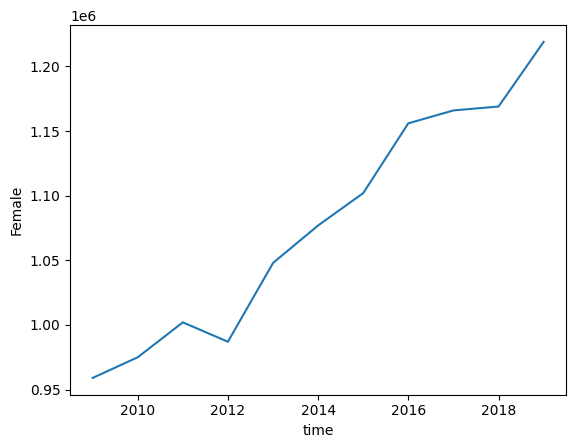

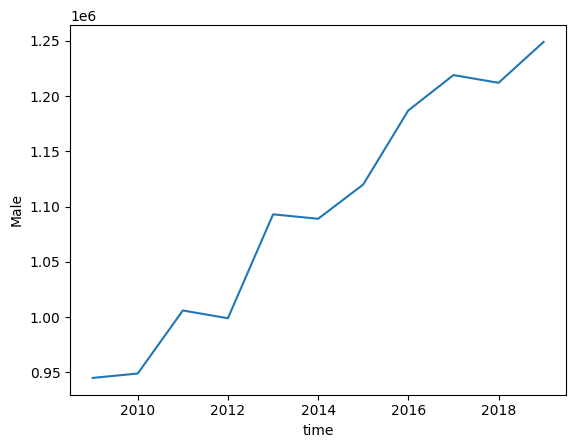

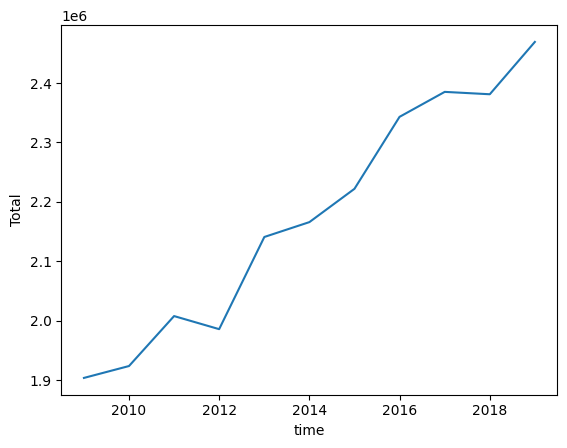

In [112]:
# Plot variables in different plots. We are interested in the Gender distribution here
for col in scope.columns:
    if col in ("Male", "Female", "Total"):
        fig = plt.figure()
        plt.plot(time, scope[col])
        plt.xlabel("time")
        plt.ylabel(col)
        fig.savefig(f"number_of_jobs_in_technical_activities_{col.lower()}.png")

#### Plot all response variables together

In [113]:
# index is the date/time as a string (object)
data2.head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009,WZ08-A,"Agriculture, forestry and fishing",220000,428000,648000
2010,WZ08-A,"Agriculture, forestry and fishing",214000,423000,637000
2011,WZ08-A,"Agriculture, forestry and fishing",213000,426000,639000
2012,WZ08-A,"Agriculture, forestry and fishing",200000,413000,612000
2013,WZ08-A,"Agriculture, forestry and fishing",186000,387000,573000


In [114]:
# convert the index to a datetime index
data2.index = pd.to_datetime(data2.index, format="%Y")

In [115]:
# now we see the index has changed to a standard datetime format
data2.head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009-01-01,WZ08-A,"Agriculture, forestry and fishing",220000,428000,648000
2010-01-01,WZ08-A,"Agriculture, forestry and fishing",214000,423000,637000
2011-01-01,WZ08-A,"Agriculture, forestry and fishing",213000,426000,639000
2012-01-01,WZ08-A,"Agriculture, forestry and fishing",200000,413000,612000
2013-01-01,WZ08-A,"Agriculture, forestry and fishing",186000,387000,573000


In [116]:
# closer look at the first item in the index
# here, the index object does not have the head() method
data2.index[0]

Timestamp('2009-01-01 00:00:00')

In [117]:
# timestamp has a method date() to get the date
data2.index[0].date()

datetime.date(2009, 1, 1)

In [118]:
# get all the rows with date 2009-1-1
data2.loc["2009, 1, 1"].head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009-01-01,WZ08-A,"Agriculture, forestry and fishing",220000,428000,648000
2009-01-01,WZ08-B,Mining and quarrying,13000,91000,104000
2009-01-01,WZ08-C,Manufacturing,2114000,5737000,7851000
2009-01-01,WZ08-D,"Electricity, gas, steam, air conditioning supply",83000,253000,335000
2009-01-01,WZ08-E,"Water supply,sewerage,waste management,remedia...",45000,180000,225000


In [132]:
# get all the rows with Sector "Professional, scientific and technical activities"
scope2 = data2[data2.Sector == "Professional, scientific and technical activities"]
scope2.head()

,Variable,Sector,Female,Male,Total
Year,,,,,
2009-01-01,WZ08-M,"Professional, scientific and technical activities",959000,945000,1904000
2010-01-01,WZ08-M,"Professional, scientific and technical activities",975000,949000,1924000
2011-01-01,WZ08-M,"Professional, scientific and technical activities",1002000,1006000,2008000
2012-01-01,WZ08-M,"Professional, scientific and technical activities",987000,999000,1986000
2013-01-01,WZ08-M,"Professional, scientific and technical activities",1048000,1093000,2141000


<Figure size 640x480 with 0 Axes>

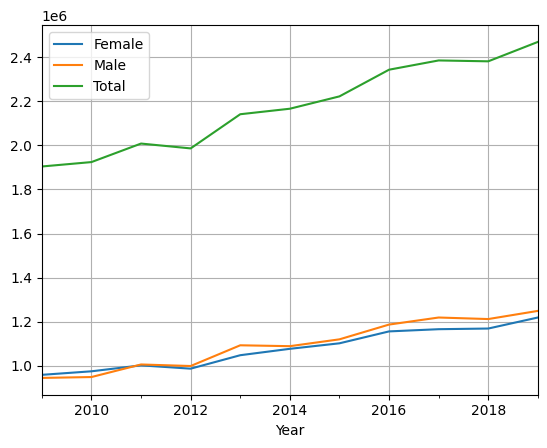

In [120]:
# use the built-in plot() method of a pandas dataframe
plt.figure()
scope2.plot()
plt.grid()
plt.legend(loc="best")

<Figure size 640x480 with 0 Axes>

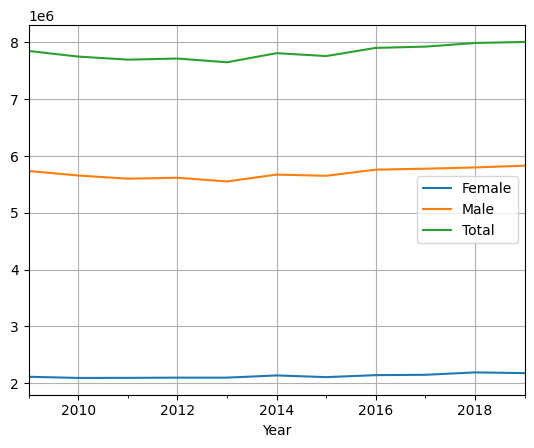

In [121]:
# get all the rows with Sector "Manufacturing"
scope3 = data2[data2.Sector == "Manufacturing"]
plt.figure()
scope3.plot()
plt.grid()
plt.legend(loc="best")

### P.S. About that name...

The name "Pandas" actually has nothing to do with the animal. It is derived from the term "panel data", an econometrics term for multidimensional structured data sets.

Funnily enough, the next generation library for faster computing is called [polars](https://pola.rs/), with a symbol of a polar bear.

![pandas](http://wdy.h-cdn.co/assets/16/05/980x490/landscape-1454612525-baby-pandas.jpg)

### Bonus read: data cleanup

Not all data comes clean, and data cleanup is a big part of data science. The main reason why data is not clean are:

* The files often contain extra headers with metadata, that need to removed from the final dataframe
* Data contain extra columns, which are blank
* Data contain empty rows, that need to be filled with values or discarded.
* Some columns need to be given names
* Data need to be normalized

For reference, here is how the original download was cleaned up and re-exported:

In [122]:
# We read the csv using a custom separator, and skipping the rows that contain metadata for the file
# Skip lines 0 to 6 and 70 to 84.
df1 = pd.read_csv(
    "../data/employment-12211-9008_en_raw.csv",
    index_col=None,
    sep=";",
    skiprows=list(range(6)) + list(range(70, 84)),
)

In [123]:
# Rename first three columns, inplace
df1.rename(
    columns={old_name: new_name for old_name, new_name in zip(df1.columns[0:3], ("Variable", "Sector", "Gender"))},
    inplace=True,
)

In [124]:
# Forward fill the missing entries. This will be done on the axis 0 (rows), inplace
df1.ffill(axis=0, inplace=True)

In [125]:
# Drop all columns that have the "e" in them. This is for some reason present on the original dataset
df1 = df1.loc[:, ~(df1 == "e").any()]

In [126]:
# Melt the dataset to use the year columns as parameters
df1 = df1.melt(id_vars=["Variable", "Sector", "Gender"], var_name="Year", value_name="Number of jobs")

In [127]:
# Finally, multiply the number of jobs by 1000, because this is stated on the metadata
df1["Number of jobs"] *= 1000

In [128]:
# Normalize the data according to our needs.
# Here, we want the "Year" and "Sector" and row properties, but the "Gender" as column definers
df1 = df1.pivot_table(values="Number of jobs", index=["Variable", "Sector", "Year"], columns="Gender")

In [129]:
# Convert data to integer type
df1 = df1.astype(int)

In [130]:
# for a fully normalised dataset we could exclude the columns saying "Total", but we keep them for now
df1.to_csv("../data/employment-12211-9008_en.csv")
df1

Gender                                                   Female    Male  \
Variable Sector                                    Year                   
WZ08-A   Agriculture, forestry and fishing         2009  220000  428000   
                                                   2010  214000  423000   
                                                   2011  213000  426000   
                                                   2012  200000  413000   
                                                   2013  186000  387000   
...                                                         ...     ...   
WZ08-U   Extraterritorial organisations and bodies 2015    8000   11000   
                                                   2016    8000   10000   
                                                   2017   10000   11000   
                                                   2018   11000   11000   
                                                   2019   10000   10000   

Gender                                                    Total  
Variable Sector                                    Year          
WZ08-A   Agriculture, forestry and fishing         2009  648000  
                                                   2010  637000  
                                                   2011  639000  
                                                   2012  612000  
                                                   2013  573000  
...                                                         ...  
WZ08-U   Extraterritorial organisations and bodies 2015   18000  
                                                   2016   19000  
                                                   2017   21000  
                                                   2018   22000  
                                                   2019   19000  

[231 rows x 3 columns]